In [2]:
# banks and other financial institutions play a crucial role in the economy by providing loans to individuals. Significant risk is loan default, to mitigate this- financial institutions leverage machine learning to predict loan defaults and make informed decisions.

In [3]:
# the project aim to build machhine learning models to predict loan defaults.

#pt1 identify high risk borrowers - by  predicting likelihood of the default, lenders can identify borrowers who pose high risk. Allows for early intervention and prevents default together.

#pt2 financial counseling and loan restructuring help to repay loans -part of the targeted strategy

#pt3 the model predictions will inform loan decisions, reducing the risk exposure for financial institutions  




In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


from sklearn.metrics import (accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay,precision_recall_curve,average_precision_score,roc_auc_score,roc_curve,auc)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import NearestCentroid
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (StandardScaler,LabelEncoder)
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

import time
import warnings
warnings.filterwarnings("ignore")

In [5]:

data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Task/Loan_Default/Loan_default.csv")

In [6]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
data.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
data.describe() 

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
data.shape

(255347, 18)

In [11]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [14]:
data.columns.values

array(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'], dtype=object)

In [15]:
categorical_variables=['Education','MaritalStatus','EmploymentType','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','Default']


numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']


In [16]:
for v in categorical_variables:
    print(data[v].value_counts())
    print("-"*50)

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
--------------------------------------------------
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
--------------------------------------------------
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
--------------------------------------------------
Yes    127742
No     127605
Name: HasDependents, dtype: int64
--------------------------------------------------
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
--------------------------------------------------
Yes    127701
No     127646
Name: HasCoSigner, dtype: int64
--------------------------------------------------
0    

In [17]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


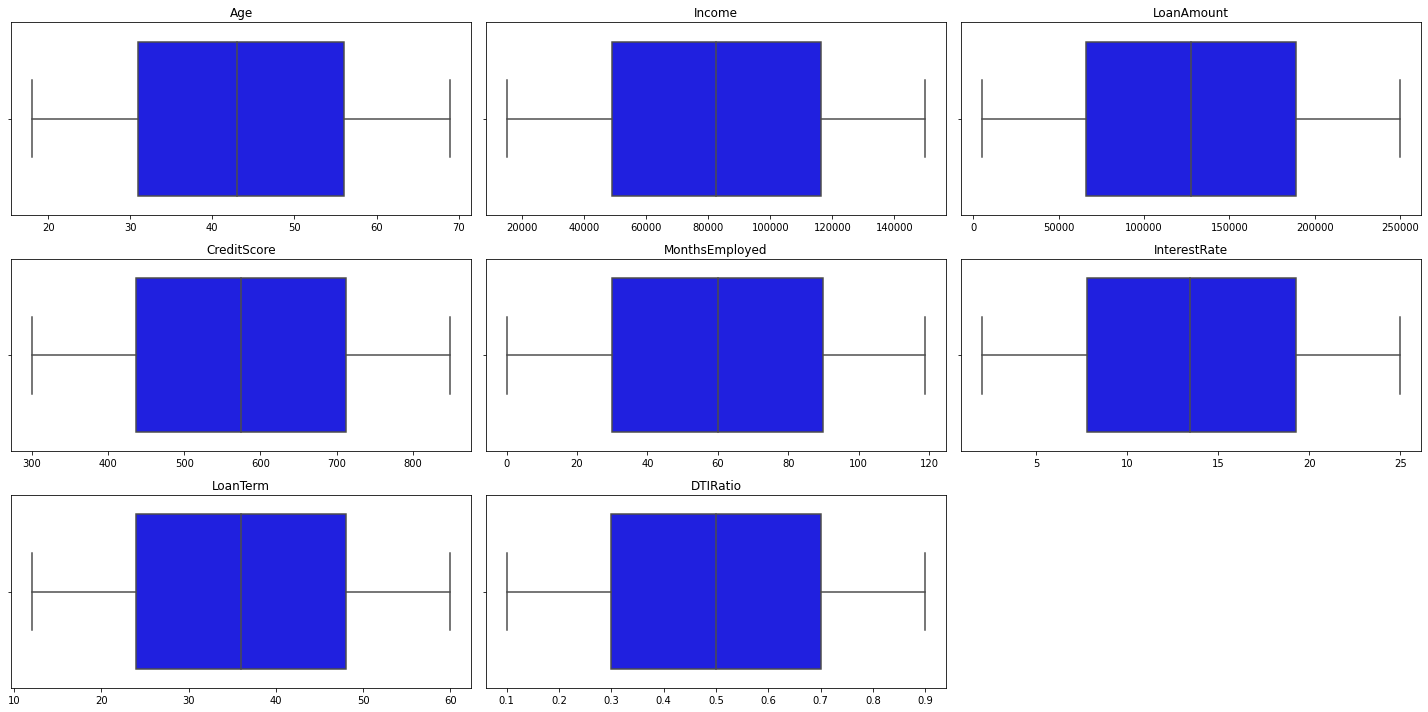

In [18]:
plt.figure(figsize=(20,10))
ind=1
for v in (numerical_variables):
    plt.subplot(3,3,ind)
    sns.boxplot(x=data[v],color='blue')
    plt.title(v)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [19]:
# no such outliers 

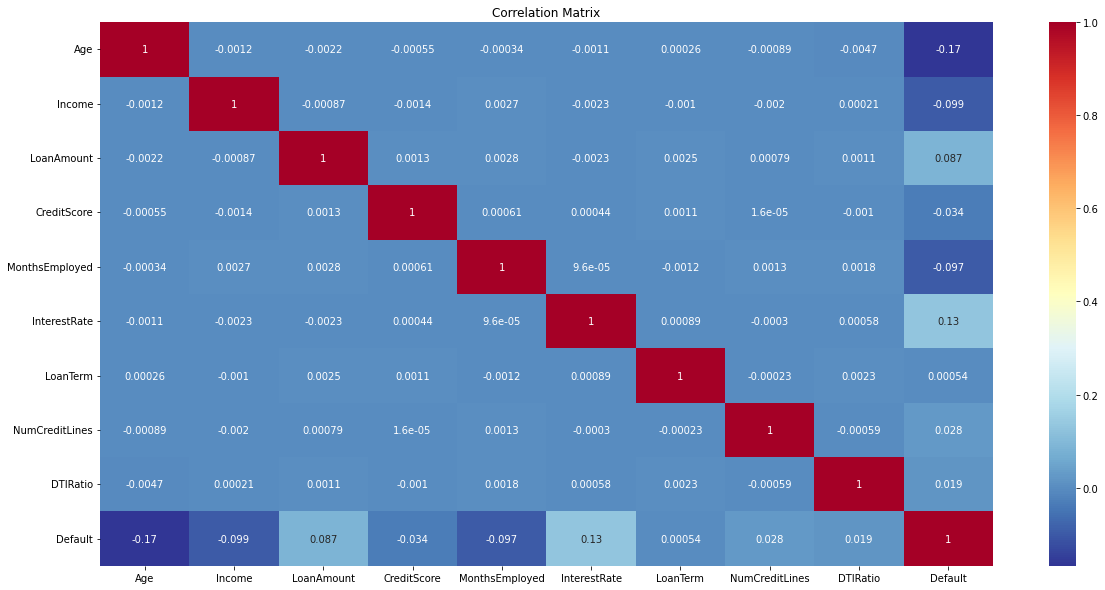

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data[['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','LoanTerm','NumCreditLines','DTIRatio','Default']].corr(), cmap=plt.cm.RdYlBu_r,annot=True)
plt.title("Correlation Matrix")
plt.show()

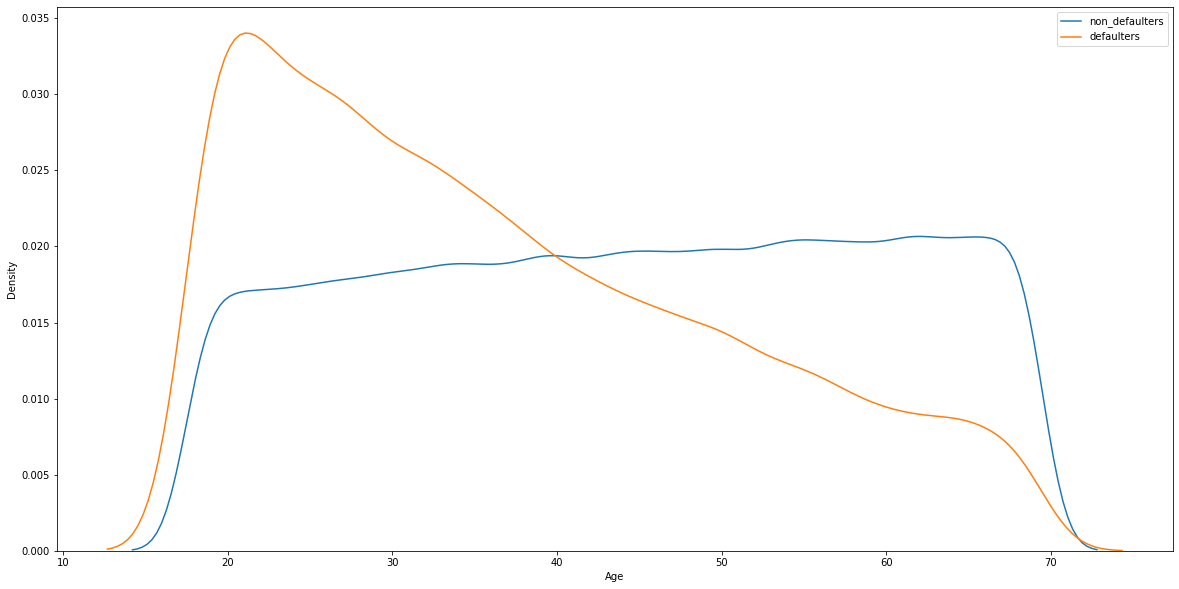

defaulters_median 34.0
non_defaulters_median 45.0


In [21]:
def kde_function(var,df):
    
    non_defaulters_median=df.loc[df['Default']==0,var].median()
    defaulters_median=df.loc[df['Default']==1,var].median()
    plt.figure(figsize=(20,10))
    sns.kdeplot(df.loc[df['Default']==0,var],label='non_defaulters')
    sns.kdeplot(df.loc[df['Default']==1,var],label='defaulters')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print('defaulters_median',defaulters_median)
    print('non_defaulters_median',non_defaulters_median)
    





kde_function('Age',data)

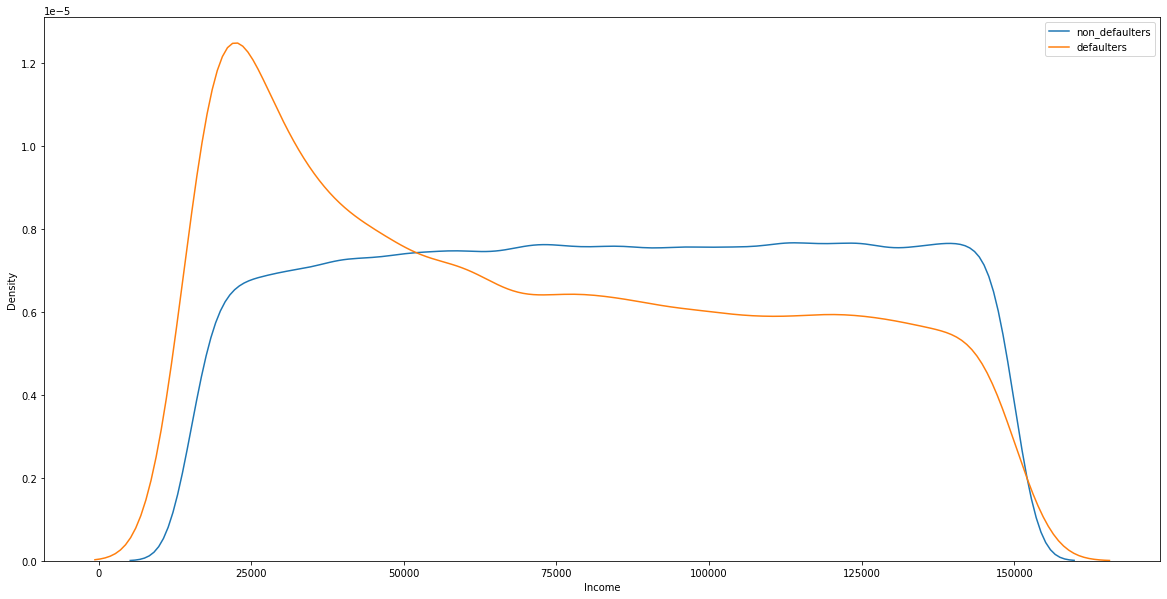

defaulters_median_Income 66566.0
non_defaulters_median_Income 84237.5


In [22]:
def kde_function(var,df):
    
    non_defaulters_median_Income=df.loc[df['Default']==0,var].median()
    defaulters_median_Income=df.loc[df['Default']==1,var].median()
    plt.figure(figsize=(20,10))
    sns.kdeplot(df.loc[df['Default']==0,var],label='non_defaulters')
    sns.kdeplot(df.loc[df['Default']==1,var],label='defaulters')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print('defaulters_median_Income',defaulters_median_Income)
    print('non_defaulters_median_Income',non_defaulters_median_Income)
    





kde_function('Income',data)

In [23]:
# adding in new feature
data['LoantoIncomeRatio']=data['LoanAmount']/data['Income']
data['FinancialRiskScore']=data['CreditScore']-data['LoantoIncomeRatio']+ (data['MonthsEmployed']/12)

In [24]:
# higher financialriskscore means lower financial risk

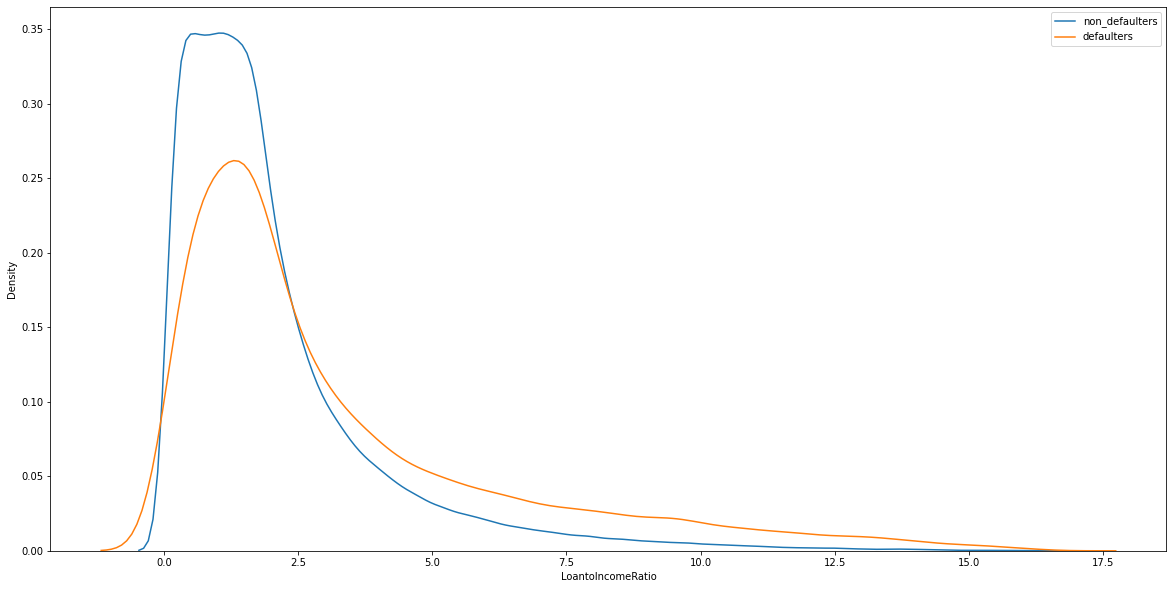

defaulters_median_Income 2.0498543070478967
non_defaulters_median_Income 1.4956471572679237


In [25]:
kde_function('LoantoIncomeRatio',data)

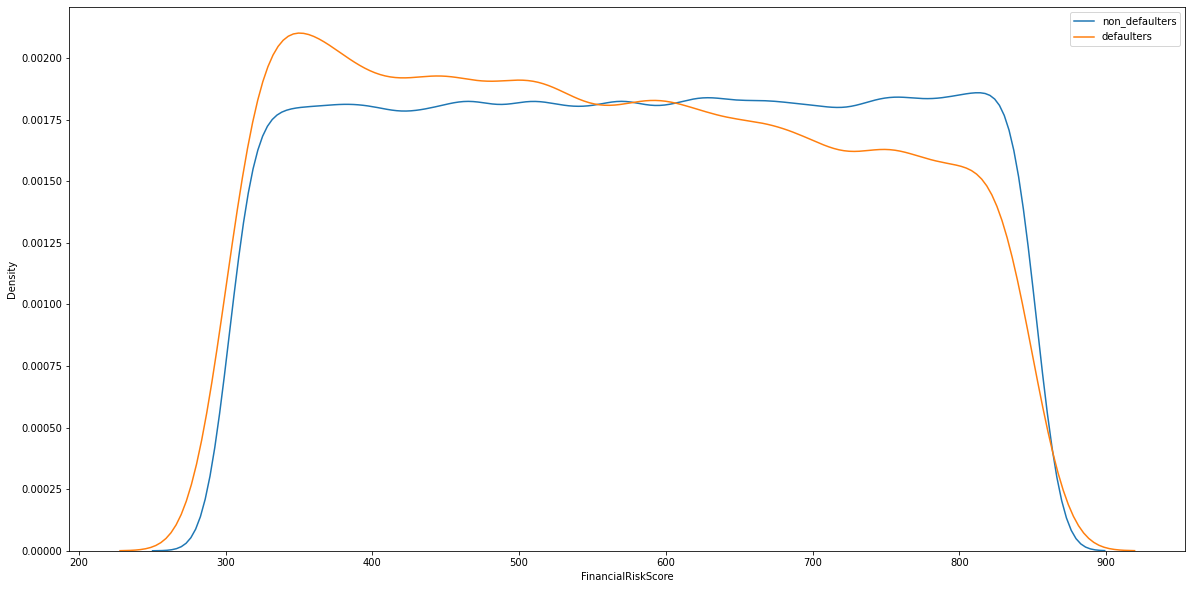

defaulters_median_Income 553.8528414237178
non_defaulters_median_Income 579.5442638488413


In [26]:
kde_function('FinancialRiskScore',data)

In [27]:
# no wonder high financialscorerisk for non-defaulters compared to defaulters


In [28]:
len(data)

255347

In [29]:
data_subset=data.sample(n=10000,random_state=42).copy()
data_subset

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoantoIncomeRatio,FinancialRiskScore
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0,0.820134,589.596533
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0,1.436895,644.063105
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0,0.964794,576.785206
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0,0.171402,335.661931
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0,0.714040,669.785960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,7UVPYLN1L1,62,24165,98173,836,87,4,2.68,12,0.23,High School,Unemployed,Divorced,No,No,Business,Yes,0,4.062611,839.187389
218372,GC9DZN9IP6,56,146949,36336,587,59,2,18.96,24,0.73,High School,Self-employed,Divorced,No,Yes,Education,No,0,0.247269,591.669397
117835,SOI9U6C94C,61,117259,91591,735,47,3,2.84,48,0.48,Master's,Self-employed,Single,No,Yes,Other,Yes,0,0.781100,738.135567
212020,ZC7NJH5YWB,42,37963,73921,733,105,1,15.89,36,0.26,Bachelor's,Self-employed,Single,No,No,Education,Yes,0,1.947185,739.802815


In [30]:
data_subset['Default'].value_counts()/len(data_subset)*100

0    88.67
1    11.33
Name: Default, dtype: float64

In [31]:
X=data_subset.drop(['Default','LoanID'],axis=1)
y=data_subset['Default']

In [32]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoantoIncomeRatio,FinancialRiskScore
51139,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0.820134,589.596533
71005,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,1.436895,644.063105
35684,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0.964794,576.785206
174087,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0.171402,335.661931
137952,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0.714040,669.785960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,62,24165,98173,836,87,4,2.68,12,0.23,High School,Unemployed,Divorced,No,No,Business,Yes,4.062611,839.187389
218372,56,146949,36336,587,59,2,18.96,24,0.73,High School,Self-employed,Divorced,No,Yes,Education,No,0.247269,591.669397
117835,61,117259,91591,735,47,3,2.84,48,0.48,Master's,Self-employed,Single,No,Yes,Other,Yes,0.781100,738.135567
212020,42,37963,73921,733,105,1,15.89,36,0.26,Bachelor's,Self-employed,Single,No,No,Education,Yes,1.947185,739.802815


In [33]:
X_encoded=pd.get_dummies(X,drop_first=True)

In [34]:
X_encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,LoantoIncomeRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
51139,55,112656,92393,581,113,2,23.54,36,0.15,0.820134,...,0,0,1,1,1,0,0,1,0,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,1.436895,...,0,0,0,1,1,0,1,0,0,1
35684,26,78169,75417,569,105,3,18.02,12,0.29,0.964794,...,0,1,0,1,1,0,1,0,0,1
174087,26,63033,10804,326,118,1,14.71,24,0.41,0.171402,...,0,0,1,0,0,1,0,0,0,1
137952,24,29665,21182,662,102,3,15.02,60,0.69,0.714040,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,62,24165,98173,836,87,4,2.68,12,0.23,4.062611,...,1,0,0,0,0,1,0,0,0,1
218372,56,146949,36336,587,59,2,18.96,24,0.73,0.247269,...,0,0,0,0,1,0,1,0,0,0
117835,61,117259,91591,735,47,3,2.84,48,0.48,0.781100,...,0,0,1,0,1,0,0,0,1,1
212020,42,37963,73921,733,105,1,15.89,36,0.26,1.947185,...,0,0,1,0,0,0,1,0,0,1


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

In [36]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [38]:
feature_importances=rf_classifier.feature_importances_
importance_df=pd.DataFrame({'Features':X_train.columns,'Importance':feature_importances})



In [39]:
selected_features=importance_df[importance_df['Importance']>0.03]['Features']

In [40]:
selected_features

0                    Age
1                 Income
2             LoanAmount
3            CreditScore
4         MonthsEmployed
6           InterestRate
7               LoanTerm
8               DTIRatio
9      LoantoIncomeRatio
10    FinancialRiskScore
Name: Features, dtype: object

In [41]:
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

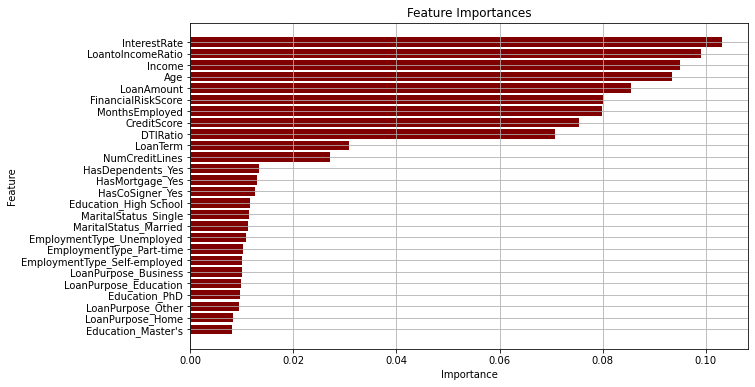

In [42]:
# plotting feature importances

importance_df_sorted=importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df_sorted['Features'],importance_df_sorted['Importance'],color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [44]:
print(X_train_selected.shape, X_test_selected.shape)

(8000, 10) (2000, 10)


In [45]:
print(y_train.shape,y_test.shape)

(8000,) (2000,)


In [47]:
print("\nDistribution of classes in y_train:")
print(y_train.value_counts(normalize=True))


Distribution of classes in y_train:
0    0.8875
1    0.1125
Name: Default, dtype: float64


In [48]:
print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))


Distribution of classes in y_test:
0    0.8835
1    0.1165
Name: Default, dtype: float64


In [49]:
# the classes are heavily unbalanced and will heavily skew the results. Thsi should be addressed to accurately preditc 'Default' variable. Applying SMOTE (Synthetic Minority Over-Sampling Technique)

In [51]:
smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train_selected,y_train)

In [55]:
X_train_selected.shape

(8000, 10)

In [57]:
y_train.shape

(8000,)

In [52]:
# Print shapes after SMOTE
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (14200, 10)
y_train_resampled shape: (14200,)
X_test_selected shape: (2000, 10)
y_test shape: (2000,)


In [53]:
print("\nDistribution of classes in y_train resampled:")
print(y_train_resampled.value_counts(normalize=True))


Distribution of classes in y_train resampled:
0    0.5
1    0.5
Name: Default, dtype: float64


In [59]:
dt_classifer=DecisionTreeClassifier()
param_grid_dt={'criterion':['gain','entropy'],'max_depth':[None,10,20,30],'min_samples_leaf':[1,2,4]}
grid_search_dt=GridSearchCV(estimator=dt_classifer,param_grid=param_grid_dt,cv=5,scoring='accuracy')
grid_search_dt.fit(X_train_resampled,y_train_resampled)
best_dt_estimator=grid_search_dt.best_estimator_

In [60]:
y_pred_dt=best_dt_estimator.predict(X_test_selected)
precision_dt=precision_score(y_test,y_pred_dt)

In [61]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

In [62]:


print("Decision Tree Classifier:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Test Precision:", precision_dt)
print("Test ROC AUC:", roc_auc_dt)

Decision Tree Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1}
Test Precision: 0.18429003021148035
Test ROC AUC: 0.5545006084365004


In [66]:
knn_classifier=KNeighborsClassifier()
param_grid_knn={'n_neighbors':[3,5,7], 'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
grid_search_knn=GridSearchCV(estimator=knn_classifier,param_grid=param_grid_knn,cv=5,scoring='accuracy')
grid_search_knn.fit(X_train_resampled,y_train_resampled)
best_knn_estimator=grid_search_knn.best_estimator_


# predicting on the test to evaluate performance

y_pred_knn=best_knn_estimator.predict(X_test_selected)
accuracy_knn=accuracy_score(y_pred_knn,y_test)
precision_knn=precision_score(y_pred_knn,y_test)
precision_knn=precision_score(y_pred_knn,y_test)
roc_auc_knn=roc_auc_score(y_pred_knn,y_test)
print(roc_auc_knn)

0.5105698005698005


In [67]:
# xgb classifier
xgb_classifier=xgb.XGBClassifier(objective='binary:logistic',random_state=42)

param_grid_xgb={'learning_rate':[0.1,0.01],'max_depth':[3,5,7],'min_child_weight':[1,3,5],'gamma':[0,0.1,0.3],'colsample_bytree':[0.5,0.7]}

grid_search_xgb=GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb,cv=5,scoring='accuracy')

grid_search_xgb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5]},
             scoring='accuracy')

In [69]:
best_xgb_classifer=grid_search_xgb.best_estimator_
y_pred_xgb=best_xgb_classifer.predict(X_test_selected)
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
recall_xgb=recall_score(y_test,y_pred_xgb)
roc_auc_xgb=roc_auc_score(y_test,y_pred_xgb)


In [72]:
roc_auc_xgb


0.5815232043836575

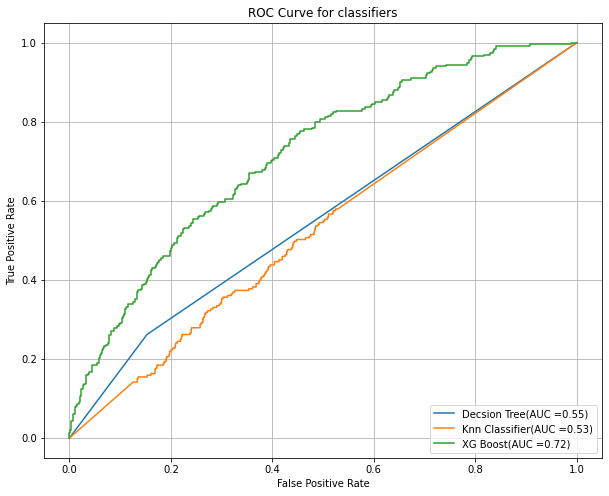

In [71]:
classifiers={'Decsion Tree': best_dt_estimator, 'Knn Classifier':best_knn_estimator, 'XG Boost': best_xgb_classifer}

plt.figure(figsize=(10,8))
for clf_name , clf in classifiers.items():
    y_prob=clf.predict_proba(X_test_selected)[:,1]

    fpr,tpr,_=roc_curve(y_test,y_prob)
    roc_auc=roc_auc_score(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{clf_name}(AUC ={roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for classifiers')    
plt.legend(loc='lower right')
plt.grid(True)
plt.show()